**Name:** Phonphrm Thawatdamrongkit
**ID**: 2330802

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import norm

### T2: Plot the posteriors values of the two classes on the same axis. Using the likelihood ratio test, what is the decision boundary for this classifier? Assume equal prior probabilities.

In [2]:
def calculate_posterior_n_decision(mean_1,std_1, mean_2, std_2, prior_1, prior_2,):
    """Calcualte the posterior probability of two normal distributed random variables
    and plot the decision boundary.

    Args:
        mean_1 (float): The mean of the first random variable (class 1)
        std_1 (float): The standard deviation of the first random variable
        mean_2 (float): The mean of the second random variable (class 2)
        std_2 (float): The standard deviation of the second random variable
    """
    # Generate a basis for the x-axis (2000 samples)
    basis = np.arange(-10, 10, 0.0001)

    # Create the PDF of likelihood
    ll_1 = norm.pdf(x=basis, loc=mean_1, scale=std_1)
    ll_2 = norm.pdf(x=basis, loc=mean_2, scale=std_2)
    p_x = ll_1 * prior_1 + ll_2 * prior_2

    # Calculate posterior from likelihood * prior / evidence
    post_1 = ll_1 * prior_1 / p_x
    post_2 = ll_2 * prior_2 / p_x
    
    
    # Calcualte the decision boundary from likelihood ratio test
    ll_ratio = ll_1 / ll_2
    prior_ratio = prior_2 / prior_1
    
    # Get the decision bound from likelihood ratio test and grab the first element that is equal to bound
    decision_bound_pos = basis[ll_ratio >= prior_ratio][0]
    decision_bound_value = ll_1[basis == decision_bound_pos][0]
    
    return basis, [ll_1, ll_2], [post_1, post_2], [decision_bound_pos, decision_bound_value]

def plot_posterior_n_decision(basis, lls, posts, decision_bound,):
    """Plot the likelihood, posterior and decision boundary.

    Args:
        basis (np.array): The basis for the x-axis
        lls (list): The likelihoods of the two classes
        posts (list): The posteriors of the two classes
        decision_bound (list): The decision boundary
    """
    
    print(f"The decision boundary is at {decision_bound[0]:.3f} with a likelihood ratio of {decision_bound[1]:.3f}")
    
    # Plot the posterior
    plt.plot(basis, posts[0], label='Posterior of class 1', color='blue')
    plt.plot(basis, posts[1], label='Posterior of class 2', color='red')
    plt.legend()
    plt.show()
    
    
    # Plot the likelihood and decision boundary
    plt.plot(basis, lls[0], label='Likelihood of class 1', color='blue')
    plt.plot(basis, lls[1], label='Likelihood of class 2', color='red')
    plt.axvline(x=decision_bound[0], color='black', linestyle='--', label='Decision boundary')
    plt.legend()
    plt.show()

The decision boundary is at 2.000 with a likelihood ratio of 0.104


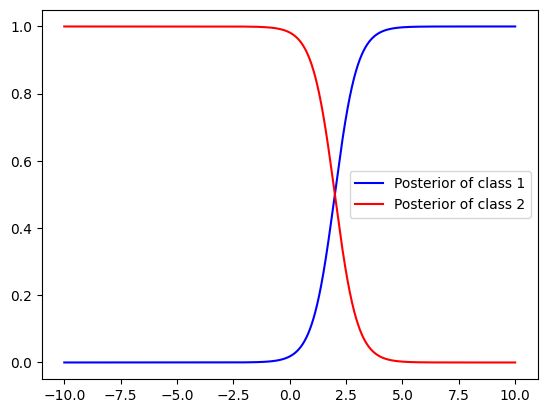

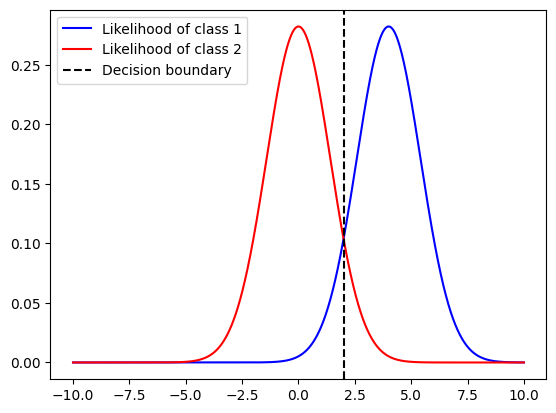

In [3]:
# given from question
mean_1 = 4
std_1 = 2**0.5
mean_2 = 0
std_2 = 2**0.5

# prior probabilities (let's say equal)
prior_1 = 0.5
prior_2 = 0.5

# calculate the value
basis, lls, posts, decision_bound = calculate_posterior_n_decision(mean_1, std_1, mean_2, std_2, prior_1, prior_2)

# plot
plot_posterior_n_decision(basis, lls, posts, decision_bound)

### T3: What happen to the decision boundary if the cat is happy with a prior of 0.75?

The decision boundary is at 1.451 with a likelihood ratio of 0.056


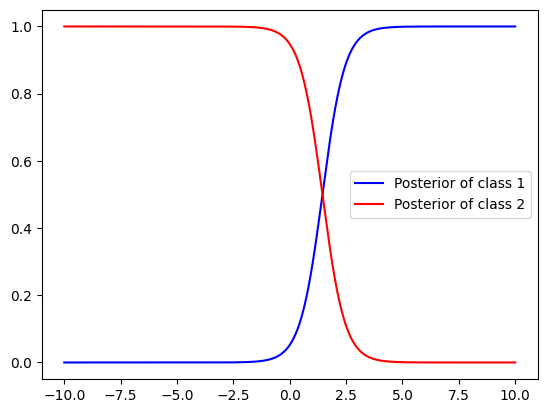

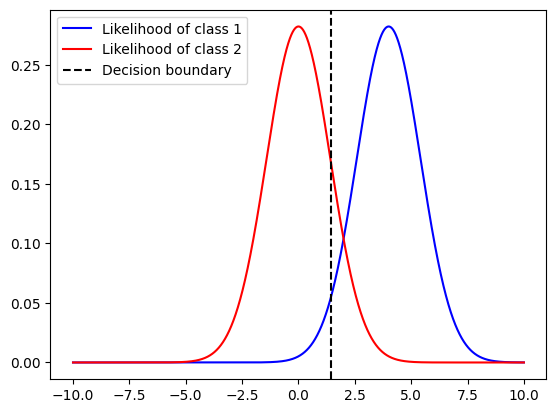

In [4]:
# given from question
mean_1 = 4
std_1 = 2**0.5
mean_2 = 0
std_2 = 2**0.5

# prior probabilitie
prior_1 = 0.75
prior_2 = 1 - prior_1

# calculate the value
basis, lls, posts, decision_bound = calculate_posterior_n_decision(mean_1, std_1, mean_2, std_2, prior_1, prior_2)

# plot
plot_posterior_n_decision(basis, lls, posts, decision_bound)

### OT3: If the student changed his model to P (x|w1 ) = N (4, 2) P (x|w2 ) = N (0, 4) Plot the posteriors values of the two classes on the same axis. What is the decision boundary for this classifier? Assume equal prior probabilities.

The decision boundary is at 2.103 with a likelihood ratio of 0.115


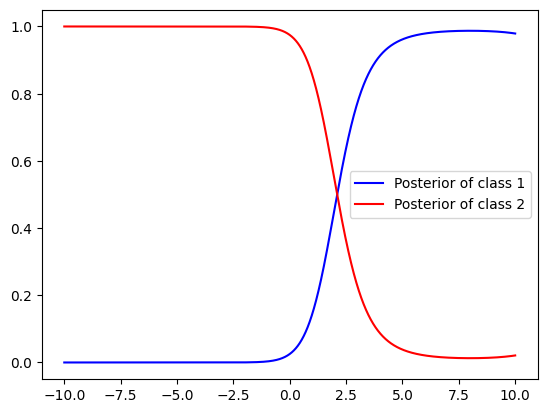

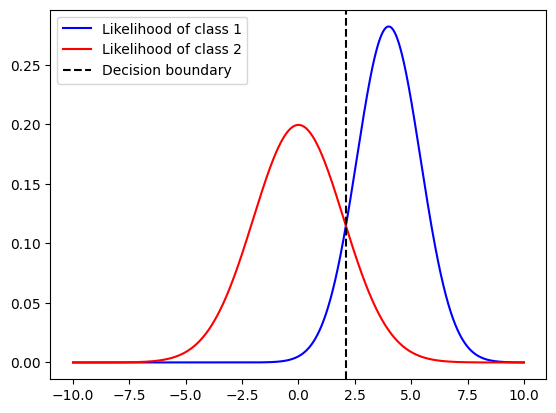

In [5]:
# given from question
mean_1 = 4
std_1 = 2**0.5
mean_2 = 0
std_2 = 4**0.5

# prior probabilitie
prior_1 = 0.5
prior_2 = 1 - prior_1

# calculate the value
basis, lls, posts, decision_bound = calculate_posterior_n_decision(mean_1, std_1, mean_2, std_2, prior_1, prior_2)

# plot
plot_posterior_n_decision(basis, lls, posts, decision_bound)

# Employee Attrition Prediction



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Set seed
np.random.seed(2330802)

### read CSV

In [8]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [9]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [10]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [11]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes

# HANDLE NULL NUMBERS
# INSERT CODE HERE

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
print(f"The numbe of Attrition 1 is {df['Attrition'].sum()} and the number of Attrition 0 is {len(df) - df['Attrition'].sum()}")
df_train, df_test = train_test_split(df, test_size=0.1, random_state=233080222, stratify=df['Attrition'])
print(f"The number of Attrition 1 in test is {df_test['Attrition'].sum()} and the number of Attrition 0 in test is {len(df_test) - df_test['Attrition'].sum()}")

The numbe of Attrition 1 is 237 and the number of Attrition 0 is 1233
The number of Attrition 1 in test is 24 and the number of Attrition 0 in test is 123


### Display histogram of each feature

In [14]:
def display_histogram(df, col_name, cls, n_bin = 40):
    
    # INSERT CODE HERE
    train_col_no_nan = df[col_name][~np.isnan(df[col_name])]
    hist, bin_edge = np.histogram(train_col_no_nan, n_bin)
    
    # Normalize the histogram to get the probability 
    hist = hist / len(train_col_no_nan)

    # Print the number of zero bins
    print(f"The number of zero bins of {cls} is {sum(hist == 0)}")

    plt.fill_between(bin_edge.repeat(2)[1: -1], hist.repeat(2), facecolor='steelblue')
    plt.title(f"Feature name: {cls}")
    plt.show()

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

The number of zero bins of Age is 0


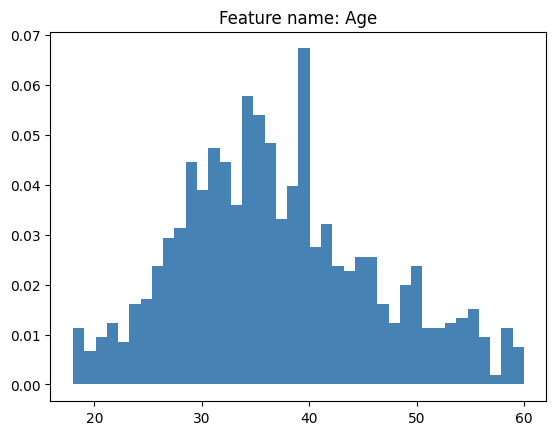

The number of zero bins of MonthlyIncome is 0


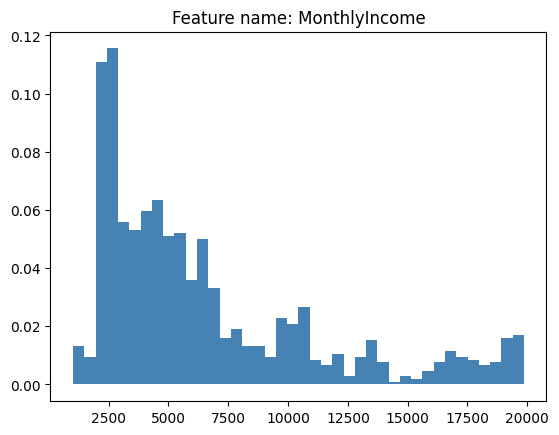

The number of zero bins of DistanceFromHome is 11


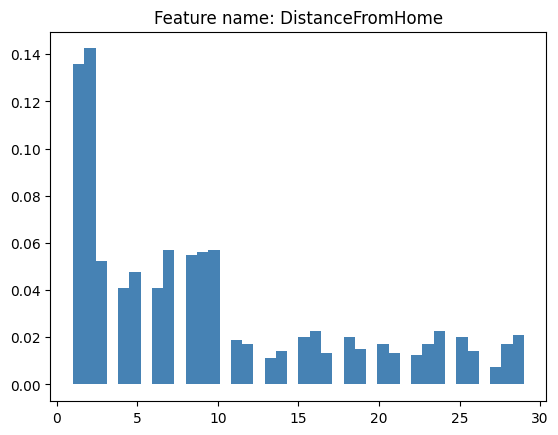

In [15]:
display_histogram(df_train, "Age", "Age", 40)
display_histogram(df_train, "MonthlyIncome", "MonthlyIncome", 40)
display_histogram(df_train, "DistanceFromHome", "DistanceFromHome", 40)

The number of zero bin are as follow:
- `Age`: 0
- `MonthlyIncome`: 0
- `DistanceFromHome`: 11

This is not a good discretization for `DistanceFromHome` because the number of zero bins is high compared to the total number of bins which 40 and the percentage of zero bins has 27.5% of the total bins. For other features like `Age` and `MonthlyIncome`, it might be a good discretization because there are no zero bins in this setting (40 bins).

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

For `Age`, it might be possible to use Gaussian to estimate the histogram because the shape is very similar to a Gaussian distribution among other histograms. For example, `MonthlyIncome` and `DistanceFromHome` are not possible to estimate using only Gaussian. However, `MonthlyIncome` might be possible to estimate using Gaussian Mixture Model (GMM) since the shape looks right-skewed distribution and similar to some known distribution. Lastly, the `DistanceFromHome` is not even possible to estimate using both Gaussian and GMM because its distribution is quite different from known distributions.

The number of zero bins of Age is 0


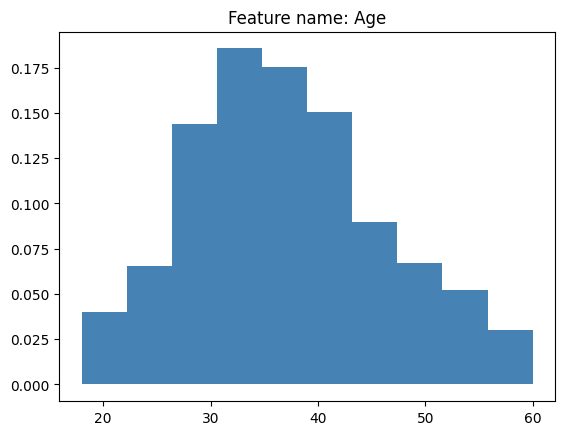

The number of zero bins of MonthlyIncome is 0


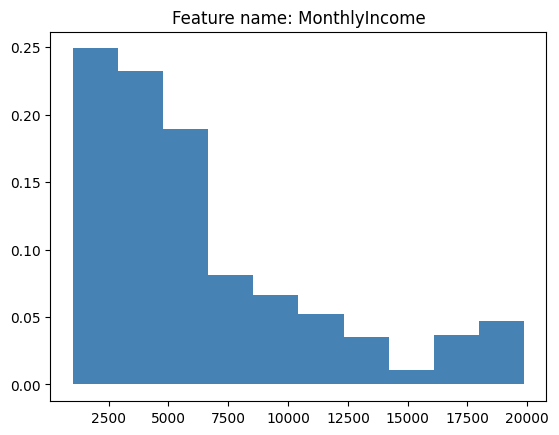

The number of zero bins of DistanceFromHome is 0


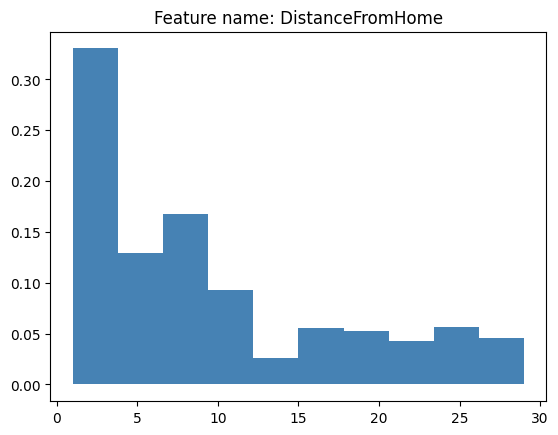

In [16]:
# change the number of bins to 10
n_bins = 10
display_histogram(df_train, "Age", "Age", n_bins)
display_histogram(df_train, "MonthlyIncome", "MonthlyIncome", n_bins)
display_histogram(df_train, "DistanceFromHome", "DistanceFromHome", n_bins)

Bin each values in the training set into bins using the function np.digitize,
then count the number in each bins using np.bincount. Be careful with the
maximum and minimum values, your first bin should cover −inf , and your final
bin should cover inf , so that you can handle test data that might be outside of
the minimum and maximum values.

In [17]:
# Test digitize function
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
b = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
basis = np.array([1, 2, 3])
digitized = np.digitize(a, basis)
bins = np.bincount(digitized)
print(digitized, bins)

[1 2 3 3 3 3 3 3 3 3] [0 1 1 8]


The bins are [0.         0.04829545 0.11742424 0.21117424 0.23295455 0.17329545
 0.09943182 0.0719697  0.0407197  0.00473485]


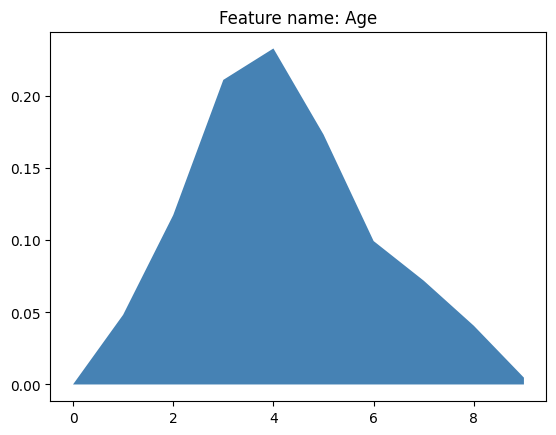

In [18]:
n_bins = 10

# Test on Age
t_train_col_no_nan = df_train["Age"][~np.isnan(df_train["Age"])]

# Get the max and min value
max_val = t_train_col_no_nan.max()
min_val = t_train_col_no_nan.min()

# Make a basis for the bins
basis = np.linspace(min_val, max_val, n_bins-1) # Since when we digitize it will add one more bin

# Append the -inf and inf to prevent test data that might be outside the min and max value
basis = np.insert(basis, 0, -1e6) # Insert -inf at the first
basis = np.append(basis, 1e6) # Append inf at the end

# Make a histogram
digitized = np.digitize(t_train_col_no_nan, basis)
bins = np.bincount(digitized)[1:] # For Ignoring the first one which is the -inf (the left area of -inf) by index start at 1

# Normalize bin
bins = bins / len(t_train_col_no_nan)
print("The bins are", bins)

# Plot the value
plt.fill_between(np.arange(0, n_bins), bins, facecolor="steelblue")
plt.title("Feature name: Age")
plt.show()


As we can see here that there exist the part where bins are zero which is the value between minimum value and lower bound

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

In [19]:
def make_hist(df, col_name, n_bins,):
    
    # Deal with null value
    train_col_no_nan = df[col_name][~np.isnan(df[col_name])]
    
    # Get the max and min value from col
    max_val = train_col_no_nan.max()
    min_val = train_col_no_nan.min()
    
    # Make a basis for the bins
    basis = np.linspace(min_val, max_val, n_bins-1) # Since when we digitize it will add one more bin
    
    # Add the boarder to prevent test data that might be outside the min and max value (inf and -inf)
    basis = np.insert(basis, 0, -1e6) # Insert -inf at the first
    basis = np.append(basis, 1e6) # Append inf at the end
    
    # Make a histogram
    digitized = np.digitize(train_col_no_nan, basis)
    bins = np.bincount(digitized)[1:] # For Ignoring the first one which is the -inf (the left area of -inf) by index start at 1
    
    # Normalize bin
    bins = bins / len(train_col_no_nan)
    
    return bins

def plot_hist(df, col_name, n_bins, label=None):
    bins = make_hist(df, col_name, n_bins)
    
    print(f"Number of zero bins in {col_name} with {n_bins} is {sum(bins == 0)}") # This may count the area outside the lower and upper bound
    plt.fill_between(np.arange(0, n_bins), bins, facecolor="steelblue")
    
    if label is not None:
        plt.title(label)
    else:
        plt.title(f"Feature name: {col_name} with bins size of {n_bins}")
    plt.show()

Plot the histogram for `Age`

Number of zero bins in Age with 10 is 1


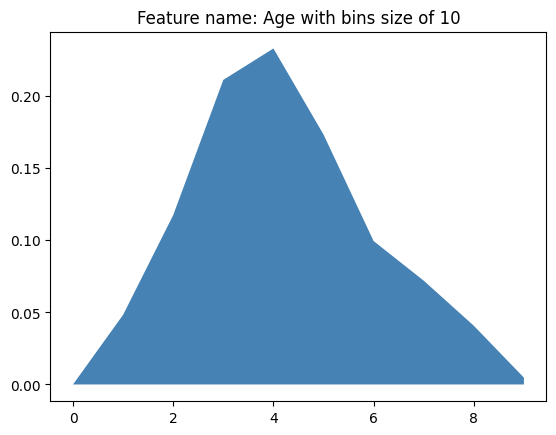

Number of zero bins in Age with 40 is 1


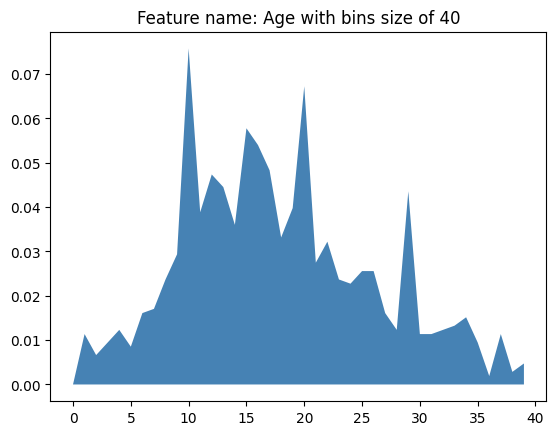

Number of zero bins in Age with 100 is 57


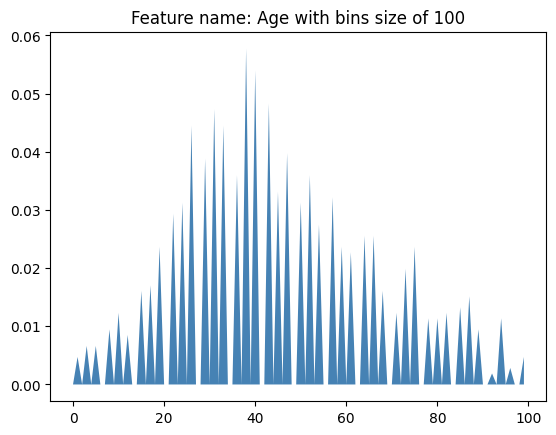

In [20]:
plot_hist(df_train, "Age", 10)
plot_hist(df_train, "Age", 40)
plot_hist(df_train, "Age", 100)

Number of zero bins in MonthlyIncome with 10 is 1


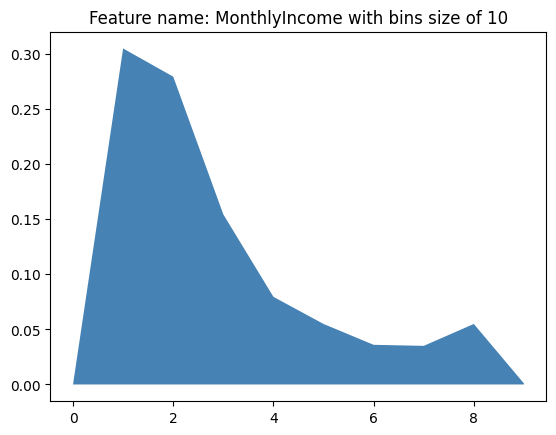

Number of zero bins in MonthlyIncome with 40 is 1


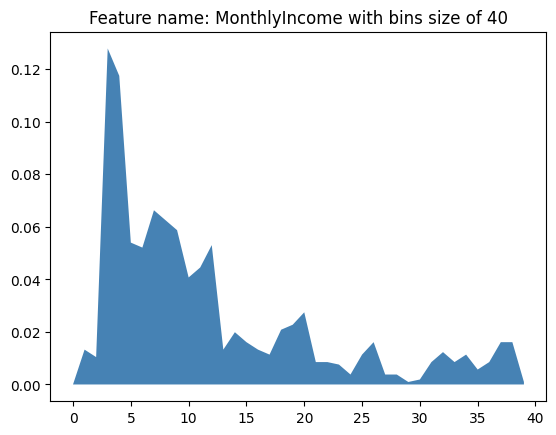

Number of zero bins in MonthlyIncome with 100 is 4


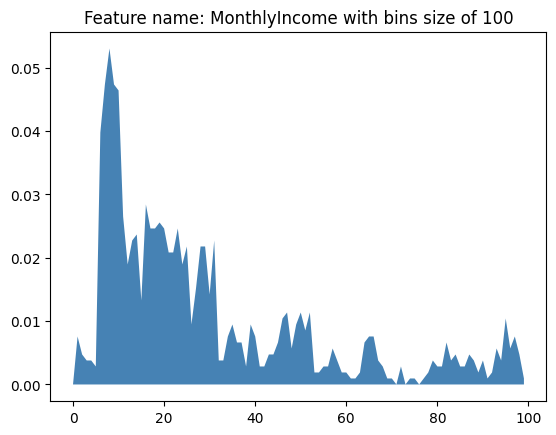

In [21]:
plot_hist(df_train, "MonthlyIncome", 10)
plot_hist(df_train, "MonthlyIncome", 40)
plot_hist(df_train, "MonthlyIncome", 100)

Number of zero bins in DistanceFromHome with 10 is 1


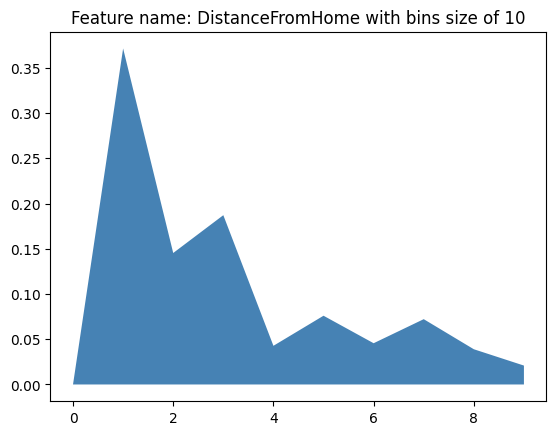

Number of zero bins in DistanceFromHome with 40 is 11


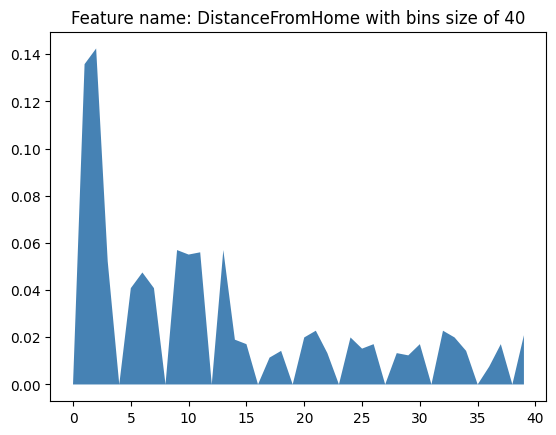

Number of zero bins in DistanceFromHome with 100 is 71


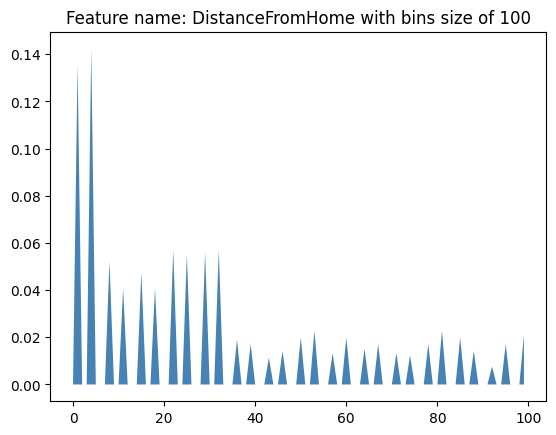

In [22]:
plot_hist(df_train, "DistanceFromHome", 10)
plot_hist(df_train, "DistanceFromHome", 40)
plot_hist(df_train, "DistanceFromHome", 100)

From all histograms, let's start analyze one by one:
- `Age`: The most sensible bin size in my opinion is 40 bins but where the larger bin like 100 bins cause a lot of zero bins. However, the 10 bins seems to be very small to capture the distribution of the age.
- `MonthlyIncome`: The most sensible bin size for this is 40 bins because the bins size larger than this will start to have zero bins.
- `DistanceFromHome`: The most sensible bin size for this is 10 bins which doesn't contain any zero bins.

**NOTE**: We don't want zero bins in our histogram when do the estimation using probability. Therefore, the practical thing if you have smaller data then use smaller bin but if you can expand the bins size without increasing the zero bins then it's better to use larger bins size.

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

To select which feature should be discretized, i will try to find it by if there exist more than 10 unique values in particular column then i will select it! However, this is just the starting point but we need to check the other factors as well after seeing the histogram. Moreover, it is likely that there will be exist the zero bins with the features with higher number of unique values. But this is nothing when you have a lot of data that cover all these unique values. In this case, I will just ignore the number of unique values less than `10`.

In [23]:
# Show how much uniques value in each column
cols = []
for col in df_train.columns:
    n_unique_val = len(df_train[col].unique())
    # Check if the number of unique value is less than 10 
    if n_unique_val < 10:
        continue
    print(f"The number of unique value in {col} is {n_unique_val}")
    cols.append(col)

print(cols)

The number of unique value in Age is 44
The number of unique value in DailyRate is 727
The number of unique value in DistanceFromHome is 30
The number of unique value in HourlyRate is 72
The number of unique value in JobRole is 10
The number of unique value in MonthlyIncome is 1002
The number of unique value in MonthlyRate is 1032
The number of unique value in NumCompaniesWorked is 11
The number of unique value in PercentSalaryHike is 16
The number of unique value in TotalWorkingYears is 40
The number of unique value in YearsAtCompany is 34
The number of unique value in YearsInCurrentRole is 20
The number of unique value in YearsSinceLastPromotion is 17
The number of unique value in YearsWithCurrManager is 18
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobRole', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Plot each histogram with 10 bins for each

Number of zero bins in Age with 10 is 1


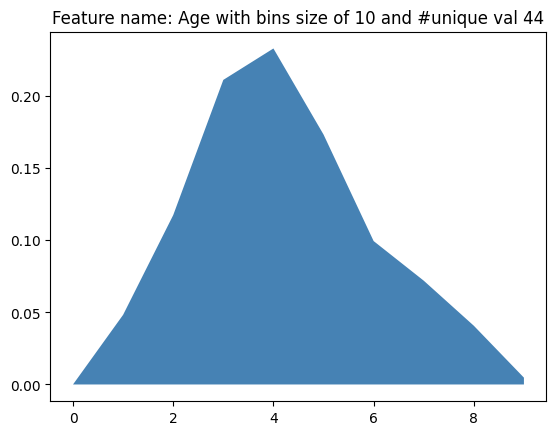

Number of zero bins in DailyRate with 10 is 1


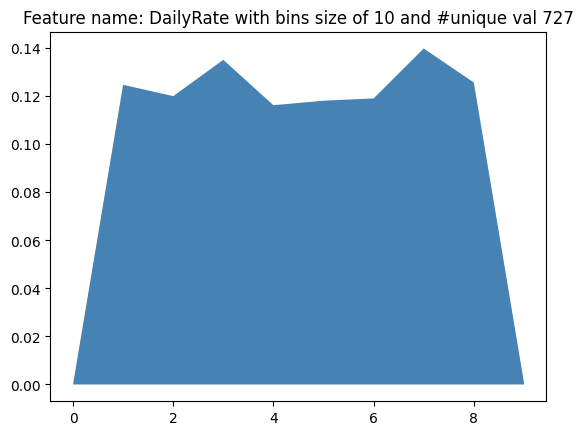

Number of zero bins in DistanceFromHome with 10 is 1


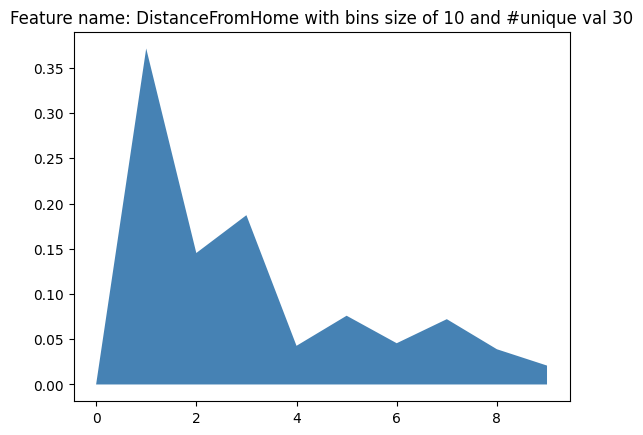

Number of zero bins in HourlyRate with 10 is 1


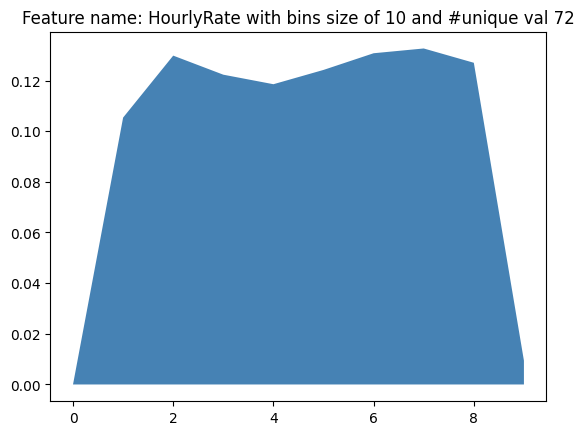

Number of zero bins in JobRole with 10 is 1


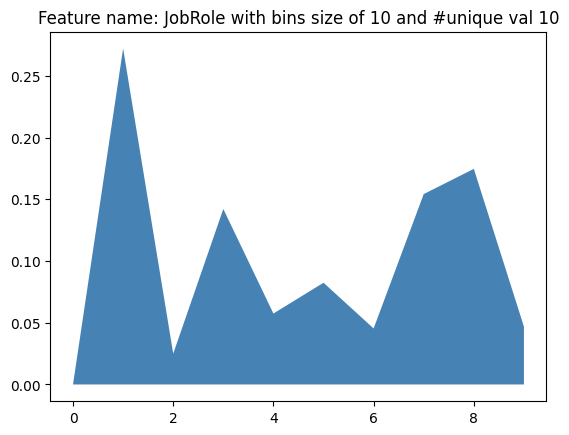

Number of zero bins in MonthlyIncome with 10 is 1


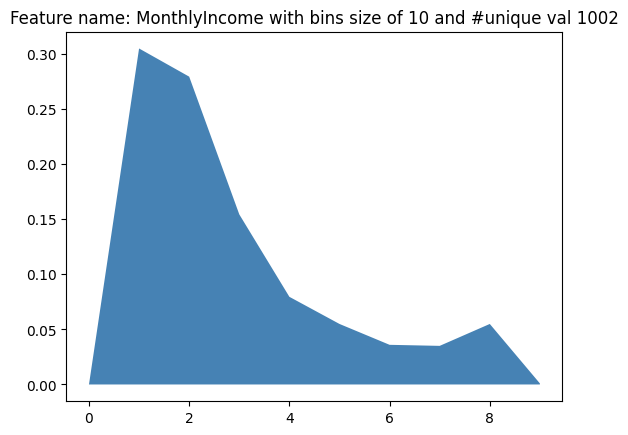

Number of zero bins in MonthlyRate with 10 is 1


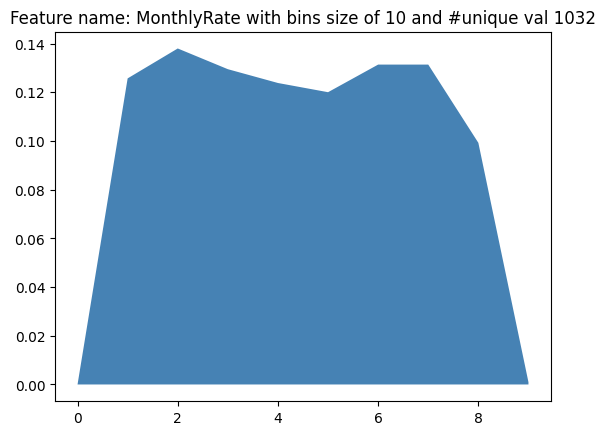

Number of zero bins in NumCompaniesWorked with 10 is 1


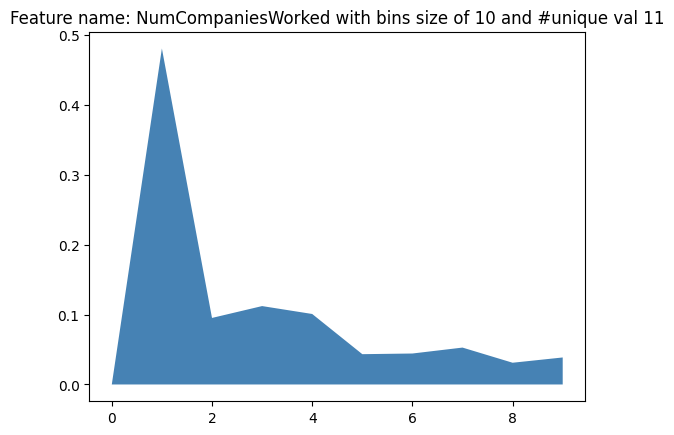

Number of zero bins in PercentSalaryHike with 10 is 1


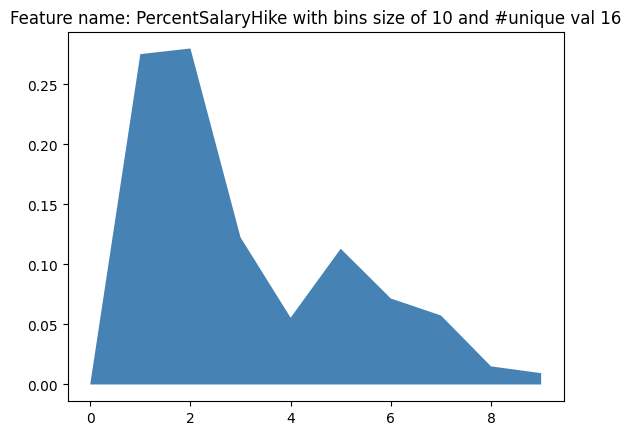

Number of zero bins in TotalWorkingYears with 10 is 1


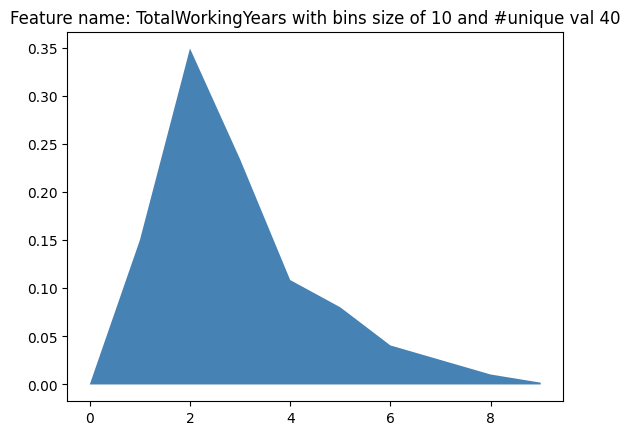

Number of zero bins in YearsAtCompany with 10 is 1


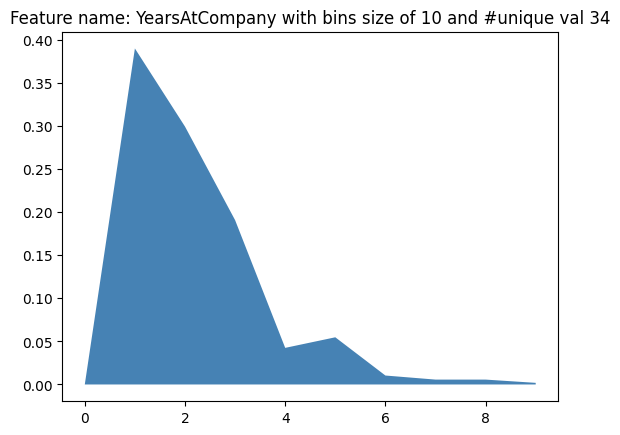

Number of zero bins in YearsInCurrentRole with 10 is 1


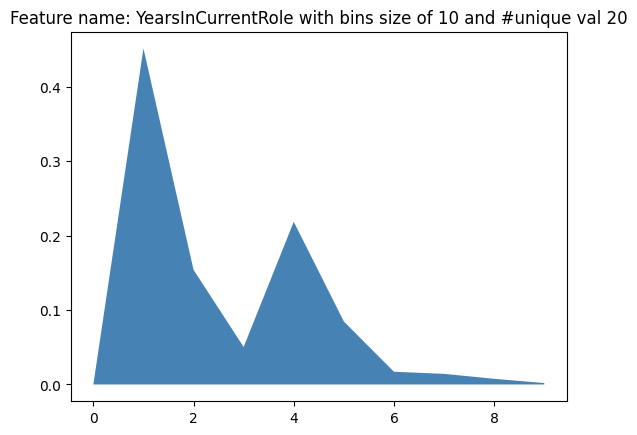

Number of zero bins in YearsSinceLastPromotion with 10 is 1


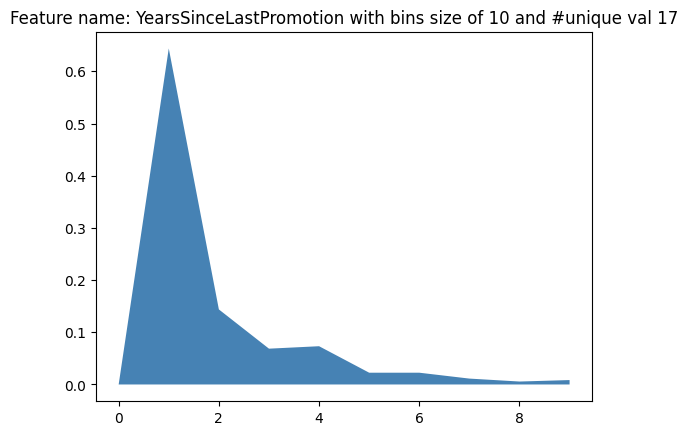

Number of zero bins in YearsWithCurrManager with 10 is 1


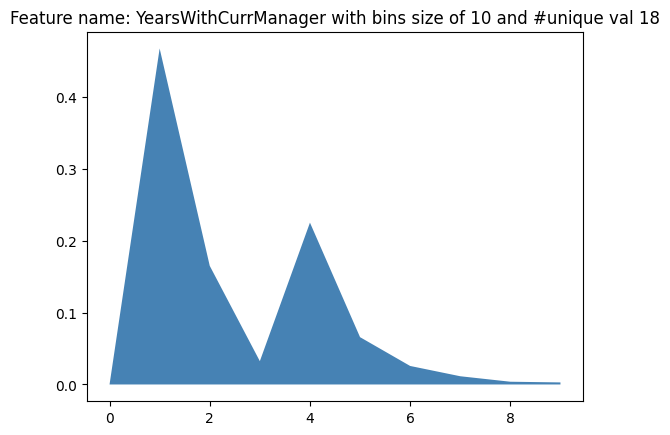

In [24]:
for col in cols:
    l = f"Feature name: {col} with bins size of 10 and #unique val {len(df_train[col].unique())}"
    plot_hist(df_train, col, 10, label=l)

Let's test on `Age` for getting the likelihood for each class and plot! $P(x | leave)$ and $P(x | stay)$

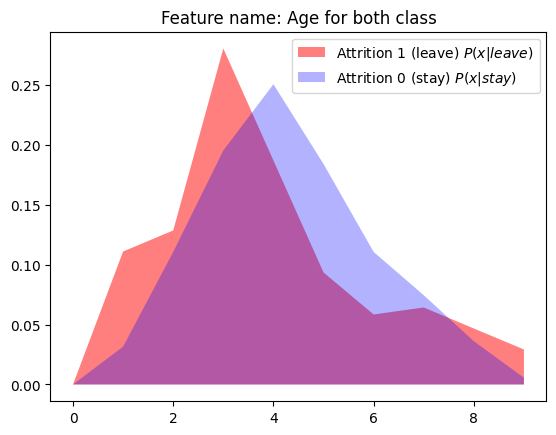

((171,), (885,))

In [25]:
# Test on Age to get the Discreteized value from the data

n_bins = 10

# Test on Age for each class label
t_train_col_no_nan_yes = df_train["Age"][~np.isnan(df_train["Age"])][df_train["Attrition"] == 1]
t_train_col_no_nan_no = df_train["Age"][~np.isnan(df_train["Age"])][df_train["Attrition"] == 0]

# Get the max and min value
max_val_yes = t_train_col_no_nan_yes.max()
min_val_yes = t_train_col_no_nan_yes.min()
max_val_no = t_train_col_no_nan_no.max()
min_val_no = t_train_col_no_nan_no.min()

# Make a basis for yes and no
basis_yes = np.linspace(min_val_yes, max_val_yes, n_bins-1)
basis_no = np.linspace(min_val_no, max_val_no, n_bins-1)

# Append lower bound and upper bound
basis_yes = np.insert(basis_yes, 0, -1e6)
basis_no = np.insert(basis_no, 0, -1e6)
basis_yes = np.append(basis_yes, 1e6)
basis_no = np.append(basis_no, 1e6)

# Discretized
digitized_yes = np.digitize(t_train_col_no_nan_yes, basis_yes)
digitized_no = np.digitize(t_train_col_no_nan_no, basis_no)
bins_yes = np.bincount(digitized_yes)[1:]
bins_no = np.bincount(digitized_no)[1:]

# Normalize bins
bins_yes = bins_yes / len(t_train_col_no_nan_yes)
bins_no = bins_no / len(t_train_col_no_nan_no)

# plot the graph with transparency
plt.fill_between(np.arange(0, n_bins), bins_yes, facecolor="red", alpha=0.5, label="Attrition 1 (leave) $P(x | leave)$")
plt.fill_between(np.arange(0, n_bins), bins_no, facecolor="blue", alpha=0.3, label="Attrition 0 (stay) $P(x | stay)$")
plt.title("Feature name: Age for both class")
plt.legend()
plt.show()


t_train_col_no_nan_yes.shape, t_train_col_no_nan_no.shape


### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

In [26]:
def make_likelihood(df, col_name, n_bins=10):
    
    # Test on Age for each class label
    masked_attrition = df["Attrition"] == 1
    train_col_no_nan_yes = df[col_name][~np.isnan(df[col_name])][masked_attrition]
    train_col_no_nan_no = df[col_name][~np.isnan(df[col_name])][~masked_attrition]
    
    # Get the max and min value from col
    max_val_yes = train_col_no_nan_yes.max()
    min_val_yes = train_col_no_nan_yes.min()
    max_val_no = train_col_no_nan_no.max()
    min_val_no = train_col_no_nan_no.min()
    
    # Make a basis for yes and no
    basis_yes = np.linspace(min_val_yes, max_val_yes, n_bins-1)
    basis_no = np.linspace(min_val_no, max_val_no, n_bins-1)
    
    # Append lower bound and upper bound
    basis_yes = np.insert(basis_yes, 0, -1e6)
    basis_yes = np.append(basis_yes, 1e6)
    basis_no = np.insert(basis_no, 0, -1e6)
    basis_no = np.append(basis_no, 1e6)
    
    # Discretized
    digitized_yes = np.digitize(train_col_no_nan_yes, basis_yes)
    digitized_no = np.digitize(train_col_no_nan_no, basis_no)
    bins_yes = np.bincount(digitized_yes)[1:]
    bins_no = np.bincount(digitized_no)[1:]
    
    # Normalize bins
    bins_yes = bins_yes / len(t_train_col_no_nan_yes)
    bins_no = bins_no / len(t_train_col_no_nan_no)
    
    return bins_yes, bins_no
    

def plot_likelihood(df, col_name, n_bins, label=None):
    bins_yes, bins_no = make_likelihood(df, col_name, n_bins)
    
    # Plot in the same figure
    plt.fill_between(np.arange(0, n_bins), bins_yes, facecolor="red", alpha=0.5, label=f"Attrition 1 (leave) $P({col_name} | leave)$")
    plt.fill_between(np.arange(0, n_bins), bins_no, facecolor="blue", alpha=0.3, label=f"Attrition 0 (stay) $P({col_name} | stay)$")
    plt.legend()
    
    if label is not None:
        plt.title(label)
    else:
        plt.title(f"Feature name: {col_name} with bins size of {n_bins}")
    plt.show()

In [27]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
b = np.array([2, 5])
np.digitize(a, b)

array([0, 1, 1, 1, 2, 2, 2, 2, 2, 2])

For the `MonthlyIncome`, the suitable distribution is the log-normal distribution, exponential distribution, or the gamma distribution because it is right-skewed distribution

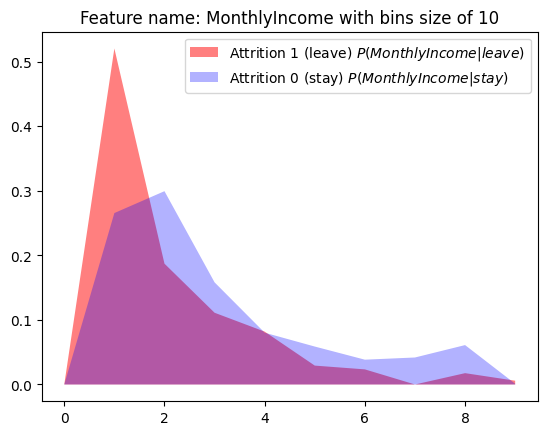

In [28]:
plot_likelihood(df_train, "MonthlyIncome", 10)

For `JobRole`, the distribution to model this histogram can be used Gaussian Mixture Model (GMM) to estimate this because there are multiple peaks in the histogram.

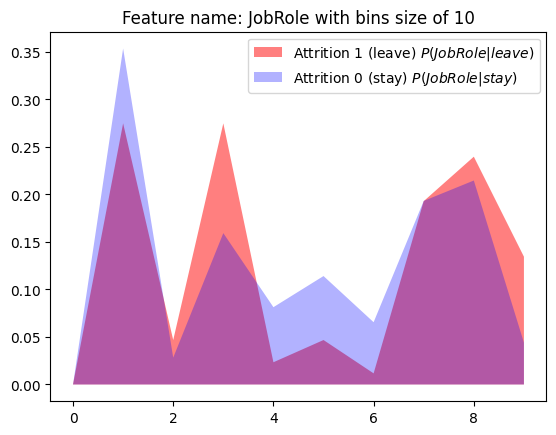

In [29]:
plot_likelihood(df_train, "JobRole", 10)

For `HourlyRate`, the proper distribution to model could be the Gaussian distribution with high variance or the uniform distribution (as we see from the figure).

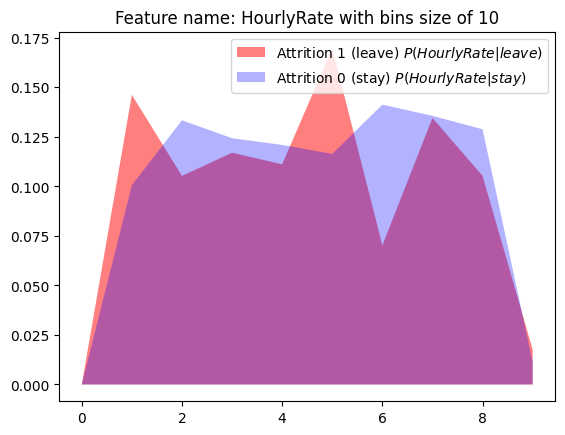

In [30]:
plot_likelihood(df_train, "HourlyRate", 10)

For `MaritalStatus`, the distribution could be Gaussian Mixture Model since we can see the obvious peaks in the histogram.

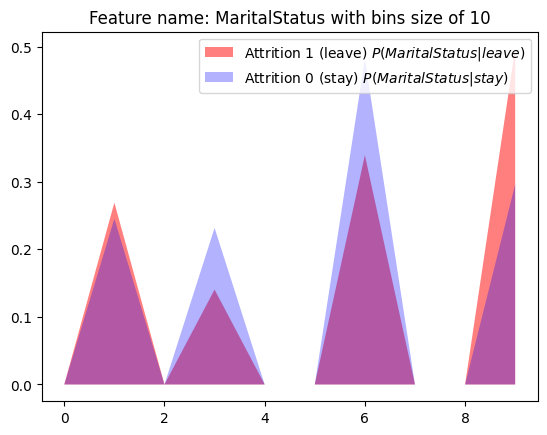

In [31]:
plot_likelihood(df_train, "MaritalStatus", 10)

### T9. What is the prior distribution of the two classes?

We can calculate the prior distribution for two classes by counting the number of each class and divide by the total number of samples.

In [32]:
n_leave = df_train[df_train["Attrition"] == 1].shape[0]
n_stay = df_train[df_train["Attrition"] == 0].shape[0]

prior_leave = n_leave / (n_leave + n_stay)
prior_stay = n_stay / (n_leave + n_stay)

print(f"The prior probability of leaving is {prior_leave:.3f} and the prior probability of staying is {prior_stay:.3f}")

The prior probability of leaving is 0.161 and the prior probability of staying is 0.839


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

Let's calculate the likelihood of each feature and see if there is any zero likelihood with respec to the class.

In [33]:
bin_size = 10

# Let's calculate the likelihood of each feature
likelihood = {}
for col in df_train.columns:
    if col == "Attrition":
        continue
    ly, ln = make_likelihood(df_train, col, bin_size)
    ly = ly[1:]
    ln = ln[1:]
    likelihood[col] = (ly, ln)

# Check if the P(x_i|attrition) contains any zero bins for each feature (ignoring the first element which is the -inf)
for col, (leave, stay) in likelihood.items():
    # Check if contain zero bin if so continue
    if sum(leave == 0) > 0 or sum(stay == 0) > 0:
        print(f"The feature {col} contains zero bins")
    else:
        continue

The feature BusinessTravel contains zero bins
The feature Department contains zero bins
The feature Education contains zero bins
The feature EducationField contains zero bins
The feature EnvironmentSatisfaction contains zero bins
The feature Gender contains zero bins
The feature JobInvolvement contains zero bins
The feature JobLevel contains zero bins
The feature JobSatisfaction contains zero bins
The feature MaritalStatus contains zero bins
The feature MonthlyIncome contains zero bins
The feature OverTime contains zero bins
The feature PerformanceRating contains zero bins
The feature RelationshipSatisfaction contains zero bins
The feature StockOptionLevel contains zero bins
The feature TotalWorkingYears contains zero bins
The feature TrainingTimesLastYear contains zero bins
The feature WorkLifeBalance contains zero bins
The feature YearsAtCompany contains zero bins
The feature YearsWithCurrManager contains zero bins


The method to fix this problem could be the **Flooring** which is adding the small value to the zero likelihood. This way can still help to not make the whole product term to be zero and preserve small probability(zero probability). Also, this method is quite easy to implement!

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [34]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [35]:
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

In [36]:
df_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
295,42.0,0,1,555.0,2,26.0,NaN,2,NaN,0,...,3.0,4.0,NaN,23.0,2.0,4.0,20.0,4.0,4.0,8.0
1127,23.0,0,2,977.0,-1,NaN,3.0,5,4.0,1,...,NaN,NaN,1.0,4.0,NaN,3.0,2.0,2.0,2.0,2.0
274,21.0,0,2,996.0,-1,3.0,2.0,3,4.0,1,...,3.0,1.0,NaN,NaN,NaN,4.0,3.0,2.0,NaN,0.0
98,58.0,0,2,NaN,-1,NaN,4.0,3,4.0,1,...,3.0,3.0,0.0,NaN,1.0,NaN,37.0,10.0,1.0,8.0
175,56.0,0,2,713.0,1,8.0,3.0,1,NaN,-1,...,3.0,3.0,NaN,19.0,3.0,NaN,NaN,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,21.0,1,2,1334.0,1,10.0,3.0,1,3.0,0,...,NaN,1.0,0.0,1.0,6.0,2.0,NaN,0.0,1.0,0.0
1279,44.0,1,-1,NaN,-1,1.0,2.0,3,3.0,-1,...,3.0,3.0,3.0,6.0,2.0,2.0,5.0,3.0,2.0,3.0
860,22.0,1,1,1256.0,1,3.0,4.0,1,3.0,1,...,3.0,NaN,1.0,NaN,5.0,3.0,0.0,0.0,NaN,0.0
1407,24.0,0,2,771.0,1,1.0,2.0,1,2.0,1,...,3.0,2.0,0.0,4.0,2.0,NaN,NaN,NaN,1.0,2.0


In [37]:
# Second column is label
x_train = np.concatenate([data_train[:, 2:], data_train[:, 0:1]], axis=1)
y_train = data_train[:, 1]

x_test = np.concatenate([data_test[:, 2:], data_test[:, 0:1]], axis=1)
y_test = data_test[:, 1]

In [38]:
model = SimpleBayesClassifier(n_pos = np.sum(y_train == 1), n_neg = np.sum(y_train == 0))

In [39]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (3/8, 5/8)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0/1, 1/1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1/1, 0/1)
    
check_prior()

In [40]:
model.fit_params(x_train, y_train)

([(array([1.00000000e-06, 2.01801802e-01, 1.00000000e-06, 8.64864865e-02,
          1.00000000e-06, 1.00000000e-06, 1.33333333e-01, 1.00000000e-06,
          1.00000000e-06, 5.78378378e-01]),
   array([-1.000e+06, -1.000e+00, -6.250e-01, -2.500e-01,  1.250e-01,
           5.000e-01,  8.750e-01,  1.250e+00,  1.625e+00,  2.000e+00,
           1.000e+06])),
  (array([1.00000000e-06, 1.25139665e-01, 1.08379888e-01, 1.36312849e-01,
          1.16201117e-01, 1.18435754e-01, 1.21787709e-01, 1.45251397e-01,
          1.27374302e-01, 1.11731844e-03]),
   array([-1.000000e+06,  1.020000e+02,  2.766250e+02,  4.512500e+02,
           6.258750e+02,  8.005000e+02,  9.751250e+02,  1.149750e+03,
           1.324375e+03,  1.499000e+03,  1.000000e+06])),
  (array([1.00000000e-06, 1.87387387e-01, 1.00000000e-06, 3.33333333e-02,
          1.00000000e-06, 1.00000000e-06, 5.57657658e-01, 1.00000000e-06,
          1.00000000e-06, 2.21621622e-01]),
   array([-1.000e+06, -1.000e+00, -6.250e-01, -2.500e-01,  1.

In [41]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [1.e-06 5.e-01 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 5.e-01]
EDGES : [-1.00e+06  0.00e+00  2.50e-01  5.00e-01  7.50e-01  1.00e+00  1.25e+00
  1.50e+00  1.75e+00  2.00e+00  1.00e+06]
Feature : 1
BINS : [1.e-06 5.e-01 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 5.e-01]
EDGES : [-1.00e+06  1.00e+00  1.25e+00  1.50e+00  1.75e+00  2.00e+00  2.25e+00
  2.50e+00  2.75e+00  3.00e+00  1.00e+06]
Feature : 2
BINS : [1.e-06 5.e-01 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 5.e-01]
EDGES : [-1.00e+06  2.00e+00  2.25e+00  2.50e+00  2.75e+00  3.00e+00  3.25e+00
  3.50e+00  3.75e+00  4.00e+00  1.00e+06]
Feature : 3
BINS : [1.e-06 5.e-01 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 5.e-01]
EDGES : [-1.00e+06  3.00e+00  3.25e+00  3.50e+00  3.75e+00  4.00e+00  4.25e+00
  4.50e+00  4.75e+00  5.00e+00  1.00e+06]

LEAVE PARAMETERS
Feature : 0
BINS : [1.e-06 5.e-01 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 5.e-01]
EDGES : [-1.00e+06  1.00e+0

In [42]:
y_pred = model.predict(x = x_test)

# Count and return the unique number
# unique, counts = np.unique(y_pred, return_counts=True)
# dict(zip(unique, counts))
len(y_pred), len(y_test)

(147, 147)

In [43]:
def evaluate(y_true, y_pred, show_result = True):
  
  # Correctly classifier
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  correct = y_true == y_pred
  
  # Accuracy
  accuracy = np.mean(correct)
  
  # Precision
  precision = np.sum(correct[y_pred == 1]) / (np.sum(y_pred == 1) + 1e-10)
  
  # Recall
  recall = np.sum(correct[y_pred == 1]) / (np.sum(y_true == 1) + 1e-10)
  
  # F1
  F1 = 2 * precision * recall / (precision + recall + 1e-10)
  
  # False positive rate
  fpr = np.sum((y_true == 0) & (y_pred == 1)) / (np.sum(y_true == 0) + 1e-10)
  
  if show_result:
    print(f"The accuracy is {accuracy:.3f}")
    print(f"The precision is {precision:.3f}")
    print(f"The recall is {recall:.3f}")
    print(f"The F1 is {F1:.3f}")
    print(f"The false positive rate is {fpr:.3f}")

  return accuracy, precision, recall, F1, fpr

In [44]:
evaluate(y_test, y_pred)
print()

The accuracy is 0.850
The precision is 0.550
The recall is 0.458
The F1 is 0.500
The false positive rate is 0.073



### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [45]:
model.fit_gaussian_params(x_train, y_train)

([(1.0882882882882883, 1.210073241677212),
  (813.4391061452513, 407.50571772564035),
  (0.8135135135135135, 0.9847473253898331),
  (9.020477815699659, 8.08217405331758),
  (2.973863636363636, 1.0370406231832152),
  (1.6081081081081081, 1.7626063387579638),
  (2.787305122494432, 1.065962178361686),
  (0.2585585585585586, 0.7703945950981749),
  (66.34375, 20.27886294559119),
  (2.772108843537415, 0.6877564477805657),
  (2.17420814479638, 1.1271896467153026),
  (3.3018018018018016, 3.058571826584285),
  (2.7910614525139663, 1.0954086462908899),
  (0.6603603603603604, 1.0427596165407242),
  (6874.822272215973, 4810.226740575429),
  (14147.525252525253, 7075.23781170891),
  (2.6553672316384183, 2.4572933080656223),
  (0.0009009009009009009, 0.618774653052668),
  (15.209039548022599, 3.591315275106826),
  (3.1455981941309257, 0.35270293448841455),
  (2.7146042363433667, 1.0824116744066246),
  (0.7950727883538634, 0.8124853829463073),
  (11.782997762863534, 7.778383225294802),
  (2.841628959

In [46]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [47]:
y_pred = model.gaussian_predict(x_test)

In [48]:
evaluate(y_test, y_pred)

The accuracy is 0.810
The precision is 0.433
The recall is 0.542
The F1 is 0.481
The false positive rate is 0.138


(0.8095238095238095,
 0.4333333333318889,
 0.5416666666644098,
 0.48148148143031555,
 0.13821138211370876)

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [49]:
y_rand = np.random.randint(0, 2, size=len(y_test))

# Evaluate
evaluate(y_test, y_rand)

The accuracy is 0.578
The precision is 0.183
The recall is 0.458
The F1 is 0.262
The false positive rate is 0.398


(0.5782312925170068,
 0.18333333333302776,
 0.4583333333314236,
 0.26190476186332196,
 0.3983739837395135)

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [50]:
# Check which class appear the most in training set
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"The class {u} appear {c} times in the training set")

# Make y_pred from majority class
majority_class = unique[np.argmax(counts)]
y_pred_majority = np.zeros(len(y_test)) + majority_class

# Evaluate
evaluate(y_test, y_pred_majority)

The class 0.0 appear 1110 times in the training set
The class 1.0 appear 213 times in the training set
The accuracy is 0.837
The precision is 0.000
The recall is 0.000
The F1 is 0.000
The false positive rate is 0.000


(0.8367346938775511, 0.0, 0.0, 0.0, 0.0)

### T15. Compare the two baselines with your Naive Bayes classifier.


The Naive Bayes classifier with **Histogram approach** is better than the **random choice** baseline and the **majority rule** baseline (a little bit). This is because the dataset is unbalanced so **the majority** rule will guarantee to have a high accuracy but the precision, recall, f1 and false positive rate are zero.

For the Naive Bayes classifier with **learned distributions approach** has a lower accuracy overall compared to Naive Bayes classifier with **Histogram approach**. However, this method perform better than the **random choice** but still has lower accuracy than the **majority rule**. Even though the accuracy is lower than the **majority rule** approach but the precision, recall, f1 and false positive rate are all better than the **majority rule** approach.

Thus, for the conclusion, the reason why **learned distributions approach** has lower accuracy than **Histogram approach** is because the **learned distributions approach** is assumed to be the Gaussian distribution which is not practical due to each features might not distribute as a Gaussian's fashion. However, the **Histogram approach** is more practical and can be used to model the distribution of each feature with its own distribution but this approach still have a drawback which requires a lot of data point to fill the zero bin.

### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [51]:
thesholds = np.arange(-5, 5, 0.05) # Vary threshold values

best_acc = (0, 1e-9)
best_f1 = (0, 1e-9)
for t in thesholds:
    
    y_pred_t = model.predict(x_test, t)
    acc, _, _, f1, _ = evaluate(y_test, y_pred_t, show_result=False)
    
    if acc > best_acc[1]:
        best_acc = (t, acc)
    if f1 > best_f1[1]:
        best_f1 = (t, f1)

print(f"The best accuracy is {best_acc[1]:.3f} with threshold {best_acc[0]:.3f}")
print(f"The best F1 is {best_f1[1]:.3f} with threshold {best_f1[0]:.3f}")

The best accuracy is 0.871 with threshold 2.300
The best F1 is 0.604 with threshold -0.500


### T17. Plot the RoC of your classifier.

Threshold -4.050 has TPR of 0.917 and FPR of 0.545 and accuracy of 0.531
Threshold -3.050 has TPR of 0.875 and FPR of 0.398 and accuracy of 0.646
Threshold -2.050 has TPR of 0.792 and FPR of 0.244 and accuracy of 0.762
Threshold -1.050 has TPR of 0.708 and FPR of 0.138 and accuracy of 0.837
Threshold -0.050 has TPR of 0.458 and FPR of 0.073 and accuracy of 0.850
Threshold 0.950 has TPR of 0.250 and FPR of 0.024 and accuracy of 0.857
Threshold 1.950 has TPR of 0.208 and FPR of 0.008 and accuracy of 0.864
Threshold 2.950 has TPR of 0.125 and FPR of 0.000 and accuracy of 0.857
Threshold 3.950 has TPR of 0.125 and FPR of 0.000 and accuracy of 0.857
Threshold 4.950 has TPR of 0.042 and FPR of 0.000 and accuracy of 0.844


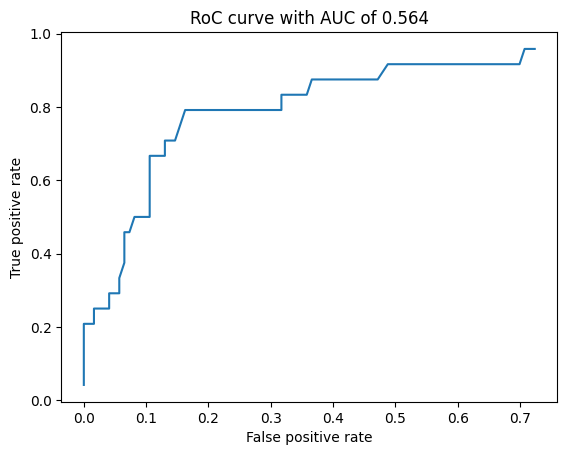

In [52]:
thresholds = np.arange(-5, 5, 0.05) # Vary threshold values

tpr_list = []
fpr_list = []
i = 0
for t in thresholds:
    
    y_pred_t = model.predict(x_test, t)
    acc_, _, tpr, _, fpr = evaluate(y_test, y_pred_t, show_result=False)
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    
    i += 1
    if i % 20 == 0:
        print(f"Threshold {t:.3f} has TPR of {tpr:.3f} and FPR of {fpr:.3f} and accuracy of {acc_:.3f}")

# Compute the AUC
auc = -np.trapz(tpr_list, fpr_list)

plt.plot(fpr_list, tpr_list)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title(f"RoC curve with AUC of {auc:.3f}")
plt.show()

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


Threshold -4.050 has TPR of 0.917 and FPR of 0.691 with accuracy of 0.408
Threshold -3.050 has TPR of 0.917 and FPR of 0.537 with accuracy of 0.537
Threshold -2.050 has TPR of 0.792 and FPR of 0.333 with accuracy of 0.687
Threshold -1.050 has TPR of 0.542 and FPR of 0.154 with accuracy of 0.796
Threshold -0.050 has TPR of 0.417 and FPR of 0.049 with accuracy of 0.864
Threshold 0.950 has TPR of 0.250 and FPR of 0.000 with accuracy of 0.878
Threshold 1.950 has TPR of 0.167 and FPR of 0.000 with accuracy of 0.864
Threshold 2.950 has TPR of 0.042 and FPR of 0.000 with accuracy of 0.844
Threshold 3.950 has TPR of 0.000 and FPR of 0.000 with accuracy of 0.837
Threshold 4.950 has TPR of 0.000 and FPR of 0.000 with accuracy of 0.837


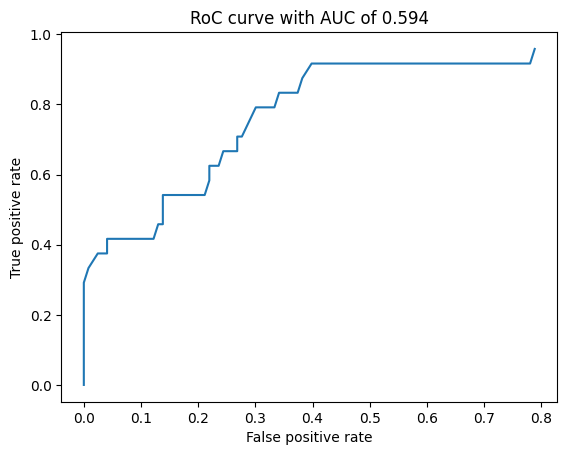

In [53]:
# Get new model
model = SimpleBayesClassifier(n_pos = np.sum(y_train == 1), n_neg = np.sum(y_train == 0))
model.fit_params(x_train, y_train, n_bins=5) # Change the number of bins to 5

thresholds = np.arange(-5, 5, 0.05) # Vary threshold values

tpr_list = []
fpr_list = []
i = 0
for t in thresholds:
    
    y_pred_t = model.predict(x_test, t)
    acc_, _, tpr, _, fpr = evaluate(y_test, y_pred_t, show_result=False)
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    
    i += 1
    if i % 20 == 0:
        print(f"Threshold {t:.3f} has TPR of {tpr:.3f} and FPR of {fpr:.3f} with accuracy of {acc_:.3f}")

# Compute the AUC
auc = -np.trapz(tpr_list, fpr_list)

plt.plot(fpr_list, tpr_list)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title(f"RoC curve with AUC of {auc:.3f}")
plt.show()

As I can see from the RoC curve, the number of discretization bins of 5 is better than the number of discretization bins of 10. This is because the AUC of the RoC curve of 5 bins is higher than the AUC of the RoC curve of 10 bins. Therefore, the number of discretization bins of 5 is better than the number of discretization bins of 10. However, this is only for this dataset with this particular train_test_split.

### OT4. Shuffle the database, and create new test and train sets. Redo the entire training and evaluation process 10 times (each time with a new training and test set). Calculate the mean and variance of the accuracy rate.

In [54]:
def load_dataset():
    
    # Load the dataset once again
    df = pd.read_csv('hr-employee-attrition-with-null.csv')

    df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
    df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
    string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                                'MaritalStatus', 'Over18', 'OverTime']

    # ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
    for col in string_categorical_col:
        # INSERT CODE HERE
        df[col] = pd.Categorical(df[col]).codes


    df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

    # Split the data
    df_train, df_test = train_test_split(df, test_size=0.1, shuffle=True)
    
    data_train = df_train.to_numpy()
    data_test = df_test.to_numpy()
    
    # Second column is label
    x_train = np.concatenate([data_train[:, 2:], data_train[:, 0:1]], axis=1)
    y_train = data_train[:, 1]

    x_test = np.concatenate([data_test[:, 2:], data_test[:, 0:1]], axis=1)
    y_test = data_test[:, 1]
    
    return (x_train, y_train), (x_test, y_test)

In [55]:
T = 10
acc_result = []

for i in range(T):
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = load_dataset()
    
    # Create a model
    model = SimpleBayesClassifier(n_pos = np.sum(y_train == 1), n_neg = np.sum(y_train == 0))
    
    # Fit data to model
    model.fit_params(x_train, y_train, n_bins=10)
    
    # Inference
    y_pred = model.predict(x_test)
    
    # Evaluate
    acc, _, _, _, _ = evaluate(y_test, y_pred, show_result=False)
    
    # Append the accuracy
    acc_result.append(acc)

print(f"The mean accuracy is {np.mean(acc_result):.3f} with variance of {np.var(acc_result):.6f}")
    

The mean accuracy is 0.845 with variance of 0.000359
